In [2]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_excel('/content/superstore_final_dataset (1).xlsx')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06 00:00:00,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [5]:
df.duplicated().any()


np.False_

In [6]:
col = ['Ship_Mode','Segment']
for column in df.columns: # getting the information about non categorical columns
    if column in col:
        print(f'{column} -> {df[column].unique()}')

Ship_Mode -> ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment -> ['Consumer' 'Corporate' 'Home Office']


In [7]:
data = df.copy()
data.drop(columns = ['Customer_ID','Customer_Name','Country','Postal_Code','Product_ID','Product_Name'], axis = True, inplace = True)

In [8]:
data.drop(columns = ['Order_ID','Row_ID'], axis = True, inplace = True)
data.head()

,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales
0,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600
1,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400
2,2017-12-06 00:00:00,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,2016-11-10 00:00:00,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775
4,2016-11-10 00:00:00,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680


In [9]:
data.isnull().sum()

,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Segment,0
City,0
State,0
Region,0
Category,0
Sub_Category,0
Sales,0


In [10]:

data['Order_Date'] = pd.to_datetime(data['Order_Date']).dt.strftime('%m-%d-%Y')
data['Ship_Date'] = pd.to_datetime(data['Ship_Date']).dt.strftime('%m-%d-%Y')
data.head()


,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales
0,08-11-2017,11-11-2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600
1,08-11-2017,11-11-2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400
2,12-06-2017,06-16-2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,11-10-2016,10-18-2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775
4,11-10-2016,10-18-2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680


In [11]:
# prompt: create a new column as shipping_time and store the absolute value of date difference between order_date and ship_data

import pandas as pd
# Convert 'Order_Date' and 'Ship_Date' to datetime objects
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Ship_Date'] = pd.to_datetime(data['Ship_Date'])

# Calculate the difference in days between 'Ship_Date' and 'Order_Date'
data['shipping_time'] = (data['Ship_Date'] - data['Order_Date']).dt.days

# Take the absolute value of the difference
data['shipping_time'] = data['shipping_time'].abs()

data.head()


,Order_Date,Ship_Date,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,shipping_time
0,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,92
1,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,92
2,2017-12-06,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,173
3,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,23
4,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,23


In [12]:
data.drop(columns = ['Order_Date','Ship_Date'], axis = True, inplace = True)
data.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,shipping_time
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,92
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,92
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,173
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,23
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,23


In [15]:
data_encoded.to_csv('cleaned_data.csv', index=False)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
data_encoded = data.copy()
obj_col = data.select_dtypes(include = 'object').columns
for col in obj_col:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    encoders[col] = le

In [16]:
data_encoded.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,shipping_time
0,2,0,194,15,2,0,4,261.9600,92
1,2,0,194,15,2,0,5,731.9400,92
2,2,1,265,3,3,1,10,14.6200,173
3,3,0,153,8,2,0,16,957.5775,23
4,3,0,153,8,2,1,14,22.3680,23


In [17]:
import joblib

# Save all LabelEncoders
joblib.dump(encoders, 'label_encoders.pkl')


['label_encoders.pkl']

<Axes: >

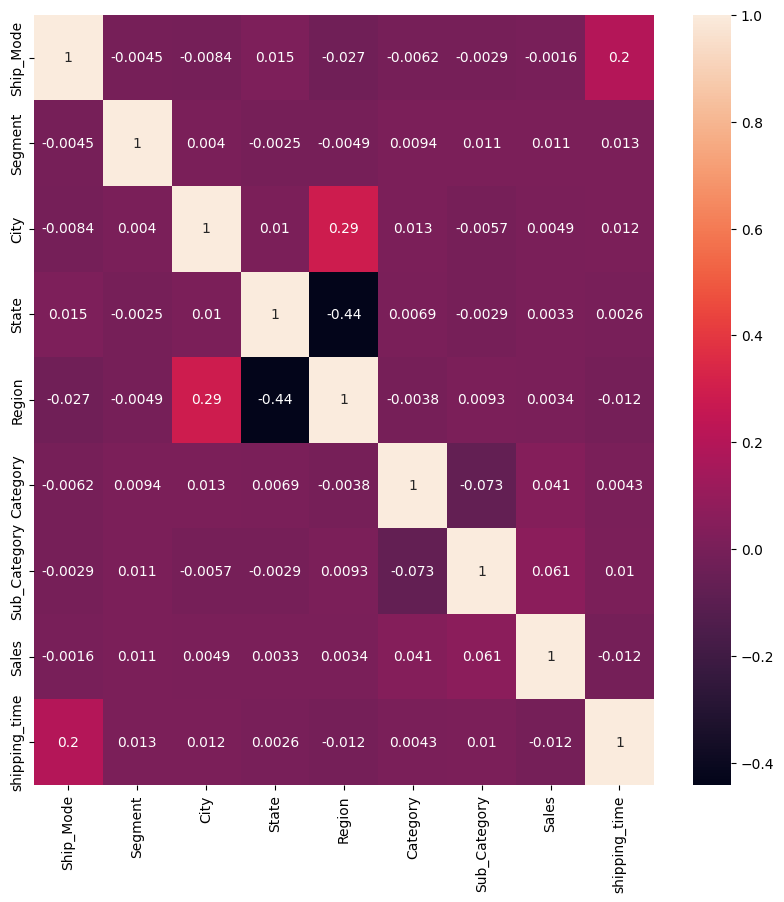

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(data_encoded.corr(), annot=True)

In [ ]:
y = data_encoded['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=20, max_features='sqrt')

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 109936.21560975516
R-squared: 0.835523267206753


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.97)
x_pca = pca.fit_transform(data_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
regressor2 = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=20, max_features='sqrt')

regressor2.fit(x_train, y_train)
y_pred = regressor2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 60118.080471925685
R-squared: 0.9100567051268733


In [ ]:
from sklearn.svm import SVR

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 448396.8532446414
R-squared: 0.3291487340418562
